In [27]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/Iris.csv')

In [29]:

data = pd.get_dummies(data, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [30]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_Iris-setosa', 'Species_Iris-versicolor',
       'Species_Iris-virginica'],
      dtype='object')


In [31]:
X = data.drop(['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'], axis = 1)


In [37]:
y = data[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]
Y
y = pd.get_dummies(data[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']])
y

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Instantiate a sequential model
model = Sequential()

# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(5,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add a dense layer with as many neurons as competitors
model.add(Dense(3, activation='softmax'))

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 2.4242 - accuracy: 0.4417
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5265 - accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3164 - accuracy: 0.2667
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0145 - accuracy: 0.4583
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9225 - accuracy: 0.4500
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9325 - accuracy: 0.4667
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7830 - accuracy: 0.6167
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.8333
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.7167
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.7167
Epoch 11/200
4/4 [===========

In [49]:
accuracy = model.evaluate(X_test,y_test)
from tensorflow.keras.utils import plot_model

1/1 [==============================] - 0s 39ms/step - loss: 0.0063 - accuracy: 1.0000


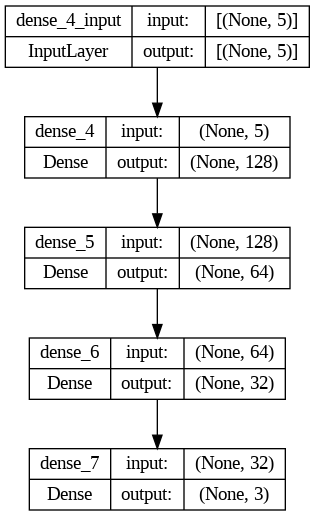

In [50]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [51]:
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print("Layer:", layer.name)
        print("Size of weight matrix:", weights[0].shape)

Layer: dense_4
Size of weight matrix: (5, 128)
Layer: dense_5
Size of weight matrix: (128, 64)
Layer: dense_6
Size of weight matrix: (64, 32)
Layer: dense_7
Size of weight matrix: (32, 3)


In [54]:
# Print predictions vs true values
preds = model.predict(X_test)
# Print predictions vs true values
print("{:20} | {}".format('Raw Model Predictions', 'True labels'))
for pred, true_label in zip(preds, y_test):
    print("{:20} | {}".format(str(pred), str(true_label)))


1/1 [==============================] - 0s 21ms/step
Raw Model Predictions | True labels
[2.5111961e-04 9.9710709e-01 2.6416108e-03] | Species_Iris-setosa
[9.999979e-01 2.014866e-06 7.427499e-16] | Species_Iris-versicolor
[3.0635858e-10 5.0306862e-04 9.9949688e-01] | Species_Iris-virginica


In [55]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print rounded model predictions vs true values
print("{:25} | {}".format('Rounded Model Predictions', 'True labels'))
for pred, true_label in zip(preds_chosen, y_test):
    print("{:25} | {}".format(pred, true_label))

Rounded Model Predictions | True labels
                        1 | Species_Iris-setosa
                        0 | Species_Iris-versicolor
                        2 | Species_Iris-virginica
